In [49]:
import numpy 
import matplotlib
import math

%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

In [30]:
h = .1 # s
earth_mass = 5.97e24 # kg
gravitational_constant = 6.67e-11 # N m2 / kg2

In [31]:
def acceleration(spaceship_position):
    ve = - spaceship_position
    return gravitational_constant*earth_mass/\
            np.linalg.norm(ve)**3 * ve

In [34]:
def ship_trajectory():
    num_steps = 130000
    x = np.zeros([num_steps + 1, 2]) # m
    v = np.zeros([num_steps + 1, 2]) # m / s

    x[0, 0] = 15e6
    x[0, 1] = 1e6
    v[0, 0] = 2e3
    v[0, 1] = 4e3
    
    for step in range(num_steps):
        x[step+1] = x[step] + v[step]*h
        v[step+1] = v[step] + acceleration(x[step])*h

    return x, v

x, v = ship_trajectory()

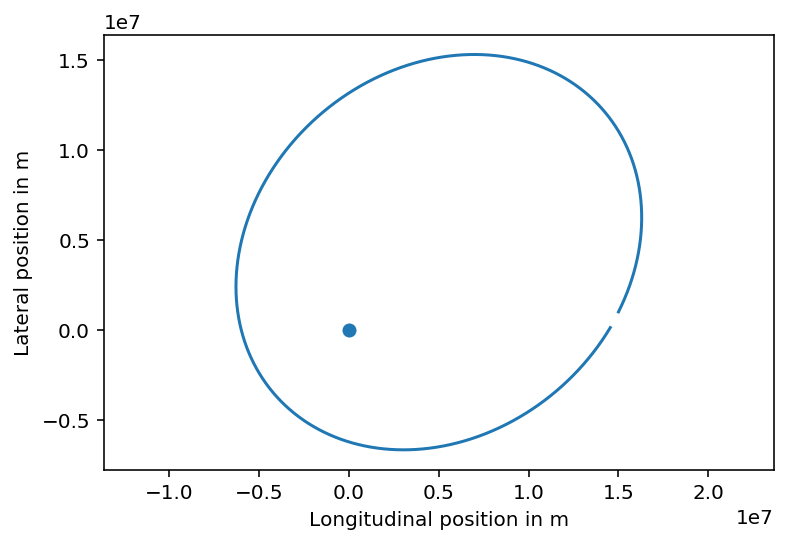

In [35]:
def plot_me():
    plt.plot(x[:, 0], x[:, 1])
    plt.scatter(0, 0)
    plt.axis('equal')
    axes = plt.gca()
    axes.set_xlabel('Longitudinal position in m')
    axes.set_ylabel('Lateral position in m')
plot_me()

In [38]:
mass_earth = 5.97e24 #kg
G = 6.67e-11 #N*m2/kg2

In [39]:
T = 24*60*60 #s

In [40]:
(G*mass_earth*T**2 /\
(4*np.pi**2))**(1/3)

42226910.176174976

||v|| = 2*np.pi*r/T <br>
||a|| = (2*np.pi/T)**2 * r

In [42]:
# These are used to keep track of the data we want to plot
h_array = []
error_array = []

total_time = 24. * 3600. # s
g = 9.81 # m / s2
earth_mass = 5.97e24 # kg
gravitational_constant = 6.67e-11 # N m2 / kg2
radius = (gravitational_constant * earth_mass * total_time**2. / 4. / math.pi ** 2.) ** (1. / 3.)
speed = 2.0 * math.pi * radius / total_time

In [43]:
def acceleration(spaceship_position):
    vector_to_earth = - spaceship_position # earth located at origin
    return gravitational_constant * earth_mass / numpy.linalg.norm(vector_to_earth)**3 * vector_to_earth

In [45]:
def calculate_error(num_steps):

    h = total_time/num_steps
    
    v = np.zeros([num_steps+1,2])
    x = np.zeros([num_steps+1,2])
    v[0] = [0,speed]
    x[0] = [radius,0]
    
    for step in range(num_steps):
        x[step+1] = x[step] + h*v[step]
        v[step+1] = v[step] + h*acceleration(x[step])
        
    error = np.linalg.norm(x[-1]-x[0])
    # This is used for plotting
    h_array.append(h)
    error_array.append(error)
    return error

### Heun's Method

In [54]:
# These are used to keep track of the data we want to plot
h_array = []
euler_error_array = []
heuns_error_array = []

In [55]:
def heuns_method(num_steps):
    ###Original Euler Method
    h = total_time / num_steps

    x = numpy.zeros([num_steps + 1, 2]) # m
    v = numpy.zeros([num_steps + 1, 2]) # m / s

    x[0, 0] = radius
    v[0, 1] = speed

    for step in range(num_steps):
        x[step + 1] = x[step] + h * v[step]
        v[step + 1] = v[step] + h * acceleration(x[step])

    error = numpy.linalg.norm(x[-1] - x[0])
    h_array.append(h)
    euler_error_array.append(error)
    ###End Original Euler Method

    ###Heun's Method
    for step in range(num_steps):
        initial_acceleration = acceleration(x[step])
        xE = x[step] + h * v[step]
        vE = v[step] + h
        x[step+1] = x[step] + h * (v[step]+vE)/2
        v[step+1] = v[step] + h * (initial_acceleration+acceleration(xE))/2

    error = numpy.linalg.norm(x[-1] - x[0])
    heuns_error_array.append(error)

    ###End Heun's Method

    return x, v, error

for num_steps in [50, 100, 200, 500, 1000]:
    x, v, error = heuns_method(num_steps) #Check x, v, error

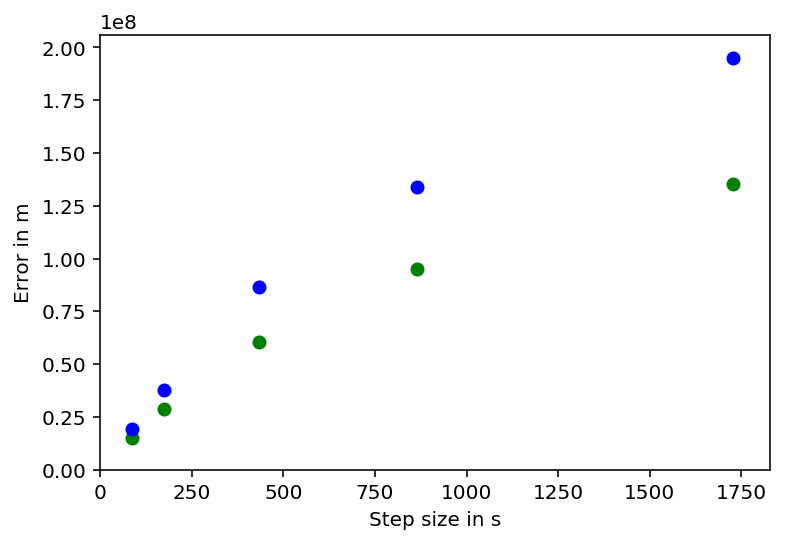

In [56]:
def plot_me():
    matplotlib.pyplot.scatter(h_array, euler_error_array, c = 'g')
    matplotlib.pyplot.scatter(h_array, heuns_error_array, c = 'b')
    matplotlib.pyplot.xlim(xmin = 0.)
    matplotlib.pyplot.ylim(ymin = 0.)
    axes = matplotlib.pyplot.gca()
    axes.set_xlabel('Step size in s')
    axes.set_ylabel('Error in m')
    
plot_me()

In [2]:
import matplotlib
import numpy
import math

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
total_time = 12500. # s
g = 9.81 # m / s2
earth_mass = 5.97e24 # kg
gravitational_constant = 6.67e-11 # N m2 / kg2

def acceleration(spaceship_position):
    vector_to_earth = - spaceship_position # earth located at origin
    return gravitational_constant * earth_mass / numpy.linalg.norm(vector_to_earth)**3 * vector_to_earth

<h2> Free Euler </h2>
<li> Adaptive Step Size</li>

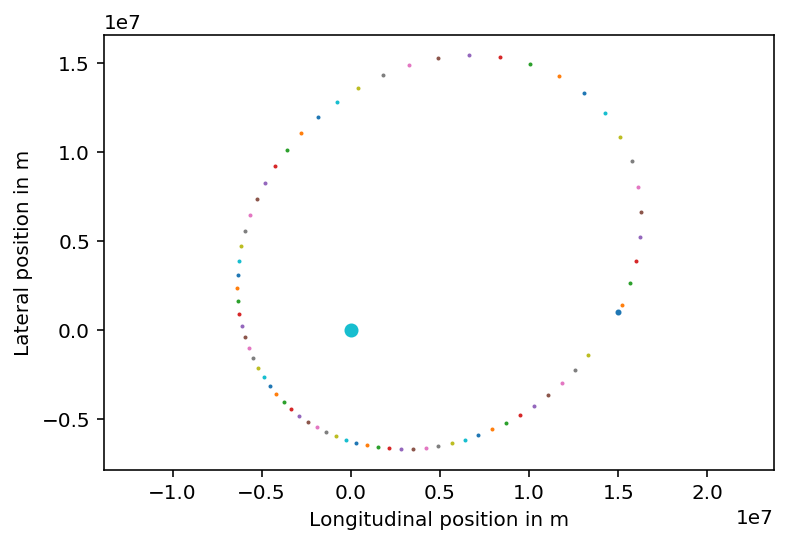

In [8]:
def orbit():
    x = numpy.zeros(2) # m
    v = numpy.zeros(2) # m / s
    x[0] = 15e6
    x[1] = 1e6    
    v[0] = 2e3
    v[1] = 4e3
    matplotlib.pyplot.scatter(x[0], x[1], s = 4)

    current_time = 0. # s
    h = 100. # s
    h_new = h # s, will store the adaptive step size of the next step
    tolerance = 5e5 # m

    while current_time < total_time:
        acceleration0 = acceleration(x)    
        xE = x + h * v
        vE = v + h * acceleration0
        xH = x + h * 0.5 * (v + vE)
        vH = v + h * 0.5 * (acceleration0 + acceleration(xE))
        x = xH
        v = vH

        ###Your code here.
        LTEe = numpy.linalg.norm(xE-xH) + numpy.linalg.norm(vE-vH)*total_time
        h_new = h*(tolerance/LTEe)**.5
        
        matplotlib.pyplot.scatter(x[0], x[1], s = 1)
        current_time += h
        h = h_new
    matplotlib.pyplot.axis('equal')
    matplotlib.pyplot.scatter(0., 0.) 
    axes = matplotlib.pyplot.gca()
    axes.set_xlabel('Longitudinal position in m')
    axes.set_ylabel('Lateral position in m')
    return x, v

x, v = orbit()

kinetic energy 动能 ：$$ \frac{1}{2}m_sV^2 $$ <br>
potantial energy 势能： $$ -\frac{Gm_sm_e}{x} $$
能量守恒:$$ \frac{1}{2}m_sV^2-\frac{Gm_sm_e}{x}=const $$ 

## Energy Programming

In [3]:
h = 5.0 # s
earth_mass = 5.97e24 # kg
spacecraft_mass = 30000. # kg
gravitational_constant = 6.67e-11 # N m2 / kg2

def acceleration(spaceship_position):
    vector_to_earth = - spaceship_position # earth located at origin
    return gravitational_constant * earth_mass / numpy.linalg.norm(vector_to_earth)**3 * vector_to_earth

In [9]:
def total_energy():
    num_steps = 20000
    x = numpy.zeros([num_steps + 1, 2]) # m
    v = numpy.zeros([num_steps + 1, 2]) # m / s
    energy = numpy.zeros(num_steps + 1) # J = kg m2 / s2

    x[0, 0] = 15e6
    x[0, 1] = 1e6
    v[0, 0] = 2e3
    v[0, 1] = 4e3

    for step in range(num_steps):
        x[step + 1] = x[step] + h * v[step] 
        v[step + 1] = v[step] + h * acceleration(x[step])
    
    energy = [.5*spacecraft_mass*numpy.linalg.norm(v[i])**2-\
             gravitational_constant*spacecraft_mass*earth_mass/numpy.linalg.norm(x[i]) for i in range(num_steps+1)]

    return x, energy

x, energy = total_energy()

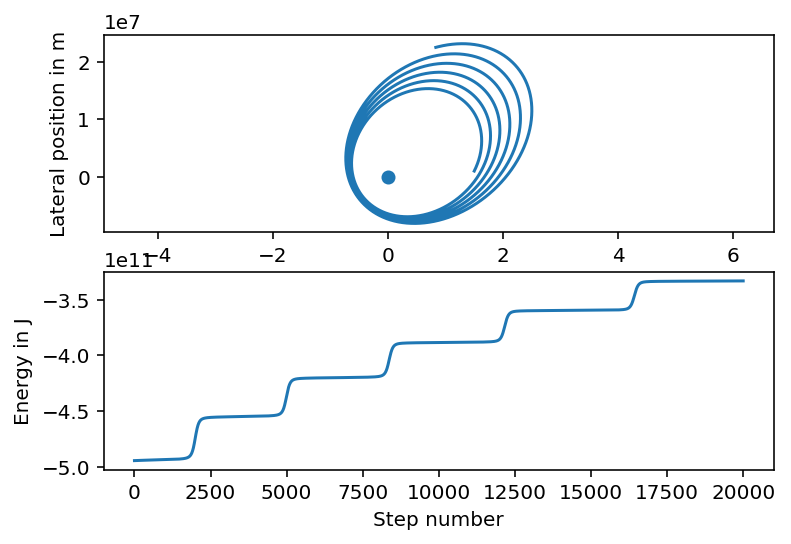

In [10]:
def plot_me():
    axes_positions = matplotlib.pyplot.subplot(211)
    matplotlib.pyplot.plot(x[:, 0], x[:, 1])
    matplotlib.pyplot.scatter(0, 0)
    matplotlib.pyplot.axis('equal')
    axes_positions.set_xlabel('Longitudinal position in m')
    axes_positions.set_ylabel('Lateral position in m')
    axes_energy = matplotlib.pyplot.subplot(212)
    matplotlib.pyplot.plot(energy)
    axes_energy.set_xlabel('Step number')
    axes_energy.set_ylabel('Energy in J') # 1 Joule = 1 N m = 1 kg m2 / s2
    
plot_me()

## Phase Space 相空间